In [47]:
import numpy as np
from sklearn.linear_model import LassoCV
import utils
from CoRT_builder import CoRT
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

<module 'utils' from 'D:\\Data Science Project\\CorT SI\\utils.py'>

In [21]:
# Start CorT
n_target = 100
n_source = 200
p = 500
K = 10
Ka = 8
h = 30
lamda = 0.1
s_vector = [0.4, 0.4, 0.4, 0.5, 0.5, 0.5, -0.6, -0.6, -0.6, -0.6]
T = 5
s = len(s_vector)
CoRT = CoRT()

target_data, source_data = CoRT.gen_data(n_target, n_source, p, K, Ka, h, s_vector, s, "AR")
similar_source_index = CoRT.find_similar_source(n_target, K, target_data, source_data, T=5, verbose=True)

X_combined, y_combined = CoRT.prepare_CoRT_data(similar_source_index, source_data, target_data)

model = LassoCV(cv=5, fit_intercept=True, random_state=42, n_jobs=-1)
model.fit(X_combined, y_combined.ravel())
beta_hat_target = model.coef_[-p:]

# SI
active_beta_hat_target = []
for b in beta_hat_target:
  if b != 0:
    active_beta_hat_target.append(b)

j = np.random.choice(np.arange(0, len(active_beta_hat_target)))

X_target = target_data["X"]
y_target = target_data["y"]
X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

Sigma = np.eye(n_target)
b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

TypeError: CoRT.find_similar_source() got an unexpected keyword argument 'verbose'

In [6]:
X_target = target_data["X"]
y_target = target_data["y"]
X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

Sigma = np.eye(n_target)
b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

folds= utils.split_target(T, X_target, y_target, n_target)

In [7]:
L_train, R_train = utils.get_Z_train(etajTy, folds, source_data, a_global, b_global, lamda, K, T)
L_val, R_val = utils.get_Z_val(folds, T, K, a_global, b_global, etajTy, lamda, source_data)
L_CoRT, R_CoRT = utils.get_Z_CoRT(X_combined, similar_source_index, lamda, a_global, b_global, source_data, etajTy)

In [19]:
print("="*100)
print(f"z_obs: {etajTy}")
print("="*100)
print(f"L_train: {L_train}")
print(f"R_train: {R_train}")
print("="*100)
print(f"L_val: {L_val}")
print(f"R_val: {R_val}")
print("="*100)
print(f"L_CoRT: {L_CoRT}")
print(f"R_CoRT: {R_CoRT}")

z_obs: -0.06391209961241484
L_train: -0.06513563587110455
R_train: -0.06339936474832128
L_val: -0.13244383718319747
R_val: -0.034550433471737384
L_CoRT: -1.1213912758549807
R_CoRT: 3.328926926045275


In [46]:
from CoRT_builder import CoRT
CoRTs = CoRT()

# Start Loop

In [1]:
%load_ext autoreload
%autoreload 2

Processing iteration 1
Processing iteration 21
Processing iteration 41
Processing iteration 61
Processing iteration 81
Processing iteration 101
Processing iteration 121
Processing iteration 141
Processing iteration 161
Processing iteration 181
Processing iteration 201
Processing iteration 221
Processing iteration 241
Processing iteration 261
Processing iteration 281
Processing iteration 301
Processing iteration 321
Processing iteration 341
Processing iteration 361
Processing iteration 381
Processing iteration 401
Processing iteration 421
Processing iteration 441
Processing iteration 461
Processing iteration 481


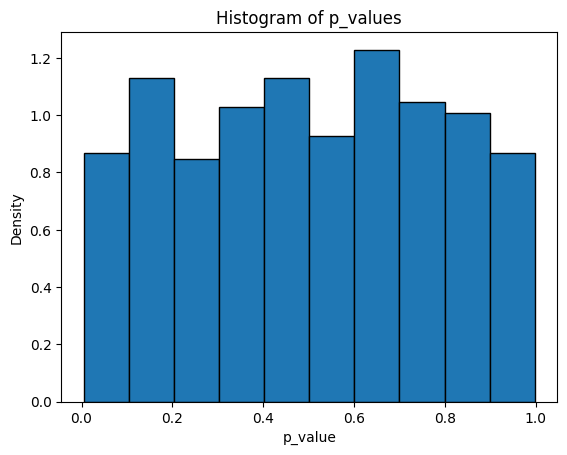

In [2]:
import numpy as np
from sklearn.linear_model import Lasso
import utils
from CoRT_builder import CoRT
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

# Start CorT
n_target = 100
n_source = 200
p = 200
K = 5
Ka = 3
h = 30
lamda = 0.03
# s_vector = [0.4, 0.4, 0.4, 0.5, 0.5, 0.5, -0.6, -0.6, -0.6, -0.6]
s_vector = [0,0,0,0,0,0,0,0,0,0]
T = 5
s = len(s_vector)
iteration = 500
CoRT = CoRT(alpha=lamda)
p_value_list = []

for iter in range(iteration):
  if (iter%20==0):
    print(f"Processing iteration {iter+1}")

  target_data, source_data = CoRT.gen_data(n_target, n_source, p, K, Ka, h, s_vector, s, "AR")
  similar_source_index = CoRT.find_similar_source(n_target, K, target_data, source_data, T=T, verbose=False)

  X_combined, y_combined = CoRT.prepare_CoRT_data(similar_source_index, source_data, target_data)

  model = Lasso(alpha=lamda, fit_intercept=False, random_state=42)
  model.fit(X_combined, y_combined.ravel())
  beta_hat_target = model.coef_[-p:]

  active_indices = np.array([i for i, b in enumerate(beta_hat_target) if b != 0])

  if len(active_indices) == 0:
      print(f"Iteration {iter}: Lasso selected no features. Skipping.")
      continue

  j = np.random.choice(len(active_indices))

  X_target = target_data["X"]
  y_target = target_data["y"]
  X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
  etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

  Sigma = np.eye(n_target)
  b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
  a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

  folds = utils.split_target(T, X_target, y_target, n_target)

  L_train, R_train = utils.get_Z_train(etajTy, folds, source_data, a_global, b_global, lamda, K, T)
  L_val, R_val = utils.get_Z_val(folds, T, K, a_global, b_global, etajTy, lamda, source_data)
  L_CoRT, R_CoRT = utils.get_Z_CoRT(X_combined, similar_source_index, lamda, a_global, b_global, source_data, etajTy)

  L_final, R_final = utils.combine_Z(L_train, R_train, L_val, R_val, L_CoRT, R_CoRT)

  etaT_sigma_eta = (etaj.T @ Sigma @ etaj).item()
  sigma_z = np.sqrt(etaT_sigma_eta)
  truncated_cdf = utils.computed_truncated_cdf(L_final, R_final, etajTy, 0, sigma_z)
  p_value = 2 * min(truncated_cdf, 1 - truncated_cdf)
  p_value_list.append(p_value.item())

plt.hist(p_value_list, bins=10, density=True, edgecolor='black')
plt.title("Histogram of p_values")
plt.xlabel("p_value")
plt.ylabel("Density")
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
import utils
from CoRT_builder import CoRT
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

# Start CorT
n_target = 100
n_source = 200
p = 500
K = 10
Ka = 8
h = 30
lamda = 0.03
# s_vector = [0.4, 0.4, 0.4, 0.5, 0.5, 0.5, -0.6, -0.6, -0.6, -0.6]
s_vector = [0,0,0,0,0,0,0,0,0,0]
T = 5
s = len(s_vector)
iteration = 500
CoRT = CoRT(alpha=lamda)
p_value_list = []

for iter in range(iteration):
  if (iter%20==0):
    print(f"Processing iteration {iter+1}")

  target_data, source_data = CoRT.gen_data(n_target, n_source, p, K, Ka, h, s_vector, s, "AR")
  similar_source_index = CoRT.find_similar_source(n_target, K, target_data, source_data, T=T, verbose=False)

  X_combined, y_combined = CoRT.prepare_CoRT_data(similar_source_index, source_data, target_data)

  model = Lasso(alpha=lamda, fit_intercept=False, random_state=42)
  model.fit(X_combined, y_combined.ravel())
  beta_hat_target = model.coef_[-p:]

  active_indices = np.array([i for i, b in enumerate(beta_hat_target) if b != 0])

  if len(active_indices) == 0:
      print(f"Iteration {iter}: Lasso selected no features. Skipping.")
      continue

  j = np.random.choice(len(active_indices))

  X_target = target_data["X"]
  y_target = target_data["y"]
  X_active, X_inactive = utils.get_active_X(beta_hat_target, X_target)
  etaj, etajTy = utils.construct_test_statistic(y_target, j, X_active)

  Sigma = np.eye(n_target)
  b_global = Sigma @ etaj @ np.linalg.pinv(etaj.T @ Sigma @ etaj)
  a_global = (np.eye(n_target) - b_global @ etaj.T) @ y_target

  folds = utils.split_target(T, X_target, y_target, n_target)

  L_train, R_train = utils.get_Z_train(etajTy, folds, source_data, a_global, b_global, lamda, K, T)
  L_val, R_val = utils.get_Z_val(folds, T, K, a_global, b_global, etajTy, lamda, source_data)
  L_CoRT, R_CoRT = utils.get_Z_CoRT(X_combined, similar_source_index, lamda, a_global, b_global, source_data, etajTy)

  L_final, R_final = utils.combine_Z(L_train, R_train, L_val, R_val, L_CoRT, R_CoRT)

  etaT_sigma_eta = (etaj.T @ Sigma @ etaj).item()
  sigma_z = np.sqrt(etaT_sigma_eta)
  truncated_cdf = utils.computed_truncated_cdf(L_final, R_final, etajTy, 0, sigma_z)
  p_value = 2 * min(truncated_cdf, 1 - truncated_cdf)
  p_value_list.append(p_value.item())

plt.hist(p_value_list, bins=10, density=True, edgecolor='black')
plt.title("Histogram of p_values")
plt.xlabel("p_value")
plt.ylabel("Density")
plt.show()

Processing iteration 1
